open() function reads in a txt file or any datafile and returns a TextIOWrapper which can be further read into string or numbers or whatver the data is sing the read() function. This read() function reads in the whole dataset as a single string, and thus we use splitlines() function to convert it into different set of strings

In [1]:
#read in the text file and print some of it's characteristics
import os

filepath = r"C:\Users\vansh\AI and ML reading material\MakeMore-Implementing NLP models\names.txt"
words = open(file = filepath, mode = 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
print(f"The length of the dataset is: {len(words)}")
print(f"Minimum length of the name: {min(len(w) for w in words)}")
print(f"Maximum length of a name is: {max(len(w) for w in words)}")


The length of the dataset is: 32033
Minimum length of the name: 2
Maximum length of a name is: 15


Now we will create a dictionary of characters which lists which character is followed by which character how many number of times

In [4]:
lambda ks: ks[1]

<function __main__.<lambda>(ks)>

In [5]:
words[0][:-1]

'emm'

In [6]:
b = {}
for w in words:
    new_name = ['.'] + list(w) + ['.'] #marking the starting and ending of each word
                                 #so that the characters at the start and the end
                                 #are clearly distinguied.
    for ch1, ch2 in zip(new_name, new_name[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 #get() functions finds the bigram key in the
                                         #dictionary and returns its frequency if its present
                                         #and 0 if it's not.
#to sort the dictionry from low to high
sorted(b.items(), key= lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

we will store this dictionary as a pytorch tensor object

In [9]:
#find the list of all characters in the data
chars = sorted(list(set(''.join(words))))

#create a map for mapping each character to an integer
id_map = {char:id for id, char in enumerate(chars)}
char_map = {id:char for id, char in enumerate(chars)}
id_map['.'] = 26

char_map[26] = '.'

In [10]:
import torch
N = torch.zeros(size=[28, 28], dtype=torch.int32)
for key in b.keys():
    N[id_map[str(list(key)[0])]][id_map[str(list(key)[1])]] = b[(str(list(key)[0]), str(list(key)[1]))]

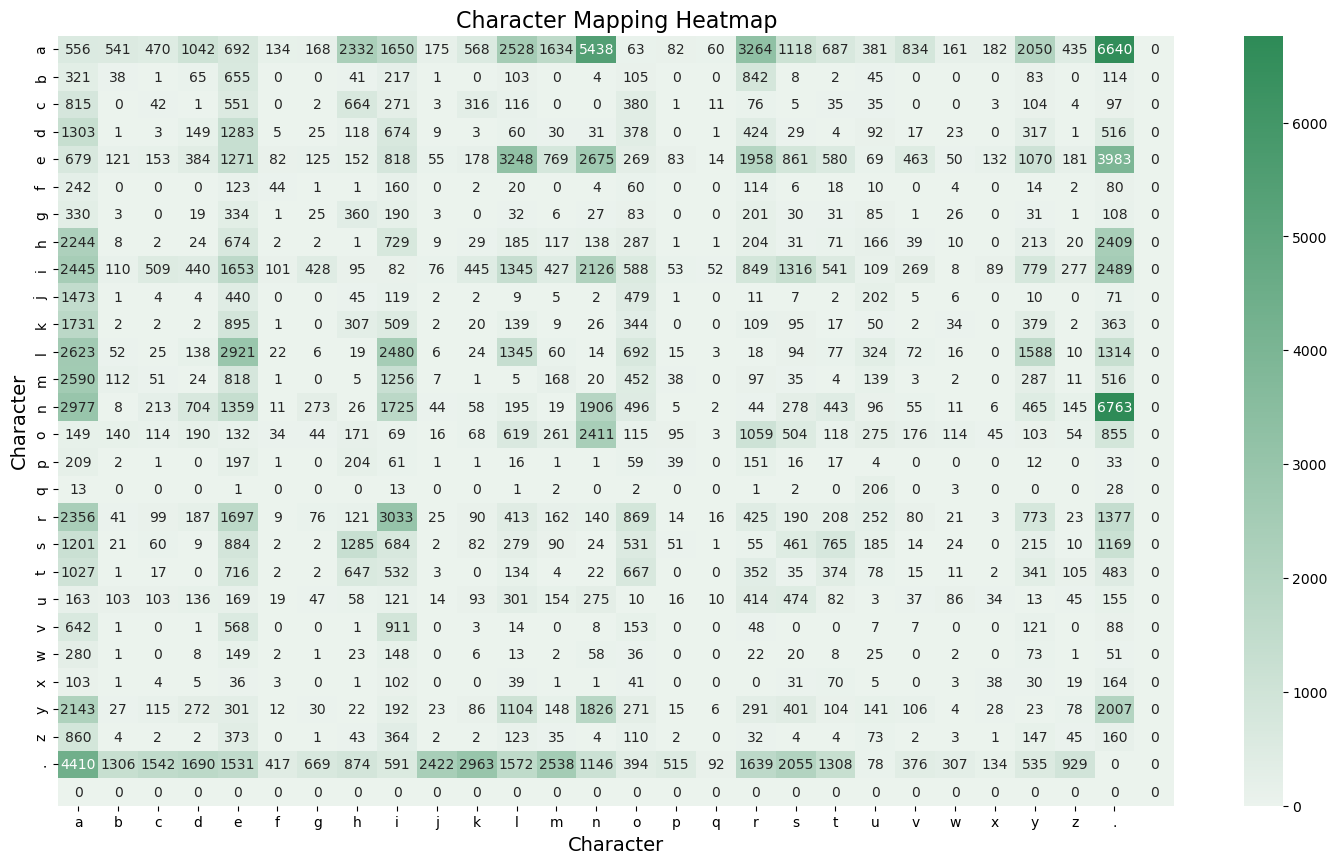

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure size
plt.figure(figsize=(18, 10))

# Customize color palette
custom_palette = sns.light_palette("seagreen", as_cmap=True)

# Plot heatmap
# Replace integers with characters on x and y axes
char_labels = [char for char, _ in sorted(id_map.items(), key=lambda x: x[1])]
sns.heatmap(np.array(N), annot=True, fmt="d", cmap=custom_palette, xticklabels=char_labels, yticklabels=char_labels)

# Set labels and title
plt.xlabel("Character", fontsize=14)
plt.ylabel("Character", fontsize=14)
plt.title("Character Mapping Heatmap", fontsize=16)

# Show plot
plt.show()


Now We will use the multinomial distribution to sample the characters, based on the probabilities that we can find from passing each of the array of the matrix "N" through a softmax function

1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,

In [12]:
#create a copy of N to convert into probability tensor

PROB = N
PROB = PROB.float()
for row in range(PROB.shape[0]):
    if(PROB[row].sum() != 0):
        PROB[row] /= PROB[row].sum()
    else:
        PROB[row] = 0
PROB

tensor([[1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02, 3.9546e-03,
         4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02, 7.4605e-02,
         4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03, 9.6326e-02,
         3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03, 5.3711e-03,
         6.0499e-02, 1.2838e-02, 1.9596e-01, 0.0000e+00],
        [1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01, 0.0000e+00,
         0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00, 3.8941e-02,
         0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00, 3.1834e-01,
         3.0246e-03, 7.5614e-04, 1.7013e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.1380e-02, 0.0000e+00, 4.3100e-02, 0.0000e+00],
        [2.3075e-01, 0.0000e+00, 1.1891e-02, 2.8313e-04, 1.5600e-01, 0.0000e+00,
         5.6625e-04, 1.8800e-01, 7.6727e-02, 8.4938e-04, 8.9468e-02, 3.2843e-02,
         0.0000e+00, 0.0000e+00, 1.0759e-01, 2.8313e-04, 3.1144e-03, 2.151

In [13]:
import torch

generator = torch.Generator().manual_seed(1234567)
for i in range(50):

    out = []
    id = 0
    while True:
        p = PROB[id]
        id= torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
        out.append(char_map[id])
        if id == 0:
            break
    print(''.join(out))



un.joondi.kis.dilefrema
lia
xya
yon.sestta
.esprilyrish.drdisra
n.ma
h.t.ma
loonya
li.a
frebrerieey.elloni.sa
nova
mijudylena
a
woijya
rvura
jv.a
yletioniellonn.a
.ta
ma
n.a
.elen.z.j.tlulle.a
lea
ka
ia
bishyn.gh.seiximona
hide.ke.brl.stonika
z.gea
helicha
nin.lmena
nel.serk.boosikelima
h.sona
filyvrina
la
i.onnni.britys.merona
h.dya
hrla
besia
lupa
mo.a
.a
nedre.eya
inuizzia
da
l.h.wa
nun.za
nniva
sia
ra
ita
ra


### GOAL: maximize the likelihood of the data w.r.t model parameters
Equivalent to maximizing the log likelihood(because it is monotonic).

Equivalent to minimizing the negative log likelihood.

Equivalent to minimizing the average negative log likelihood 

In [14]:
#we design a loss function to optimize the and check the performance of the bigram model
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        id1 = id_map[ch1]
        id2 = id_map[ch2]
        prob = PROB[id1, id2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
nll = -log_likelihood
print(f"log_likelihood: {log_likelihood}")
print(f"log likelihood loss: {-nll/n}")

log_likelihood: -559891.75
log likelihood loss: -2.454094171524048


### Neural Network Formation
We will now create a neural netowrk framework which takes in a bigram as a training data and training label.

bigram: ('ch1' , 'ch2')

ch1: training data

ch2: training label


27


(<matplotlib.image.AxesImage at 0x29c5f13a1c0>, None)

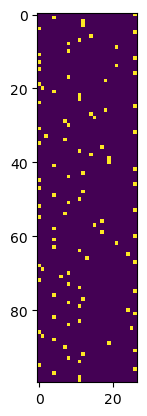

In [49]:

import torch.nn.functional as F

#create the data and label tensors
xs = []
ys = []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        id1 = id_map[ch1]
        id2 = id_map[ch2]
        xs.append(id1)
        ys.append(id2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

#one hot encode the data and label tensors
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

plt.imshow(xenc[:100]), print(xenc.shape[1])

In [37]:
xenc.shape

torch.Size([228146, 27])

#### create a neuron
here we will define a function which acts as a neuron of a neural network. That is, it takes input perfoms matrix multiplication and returns the output

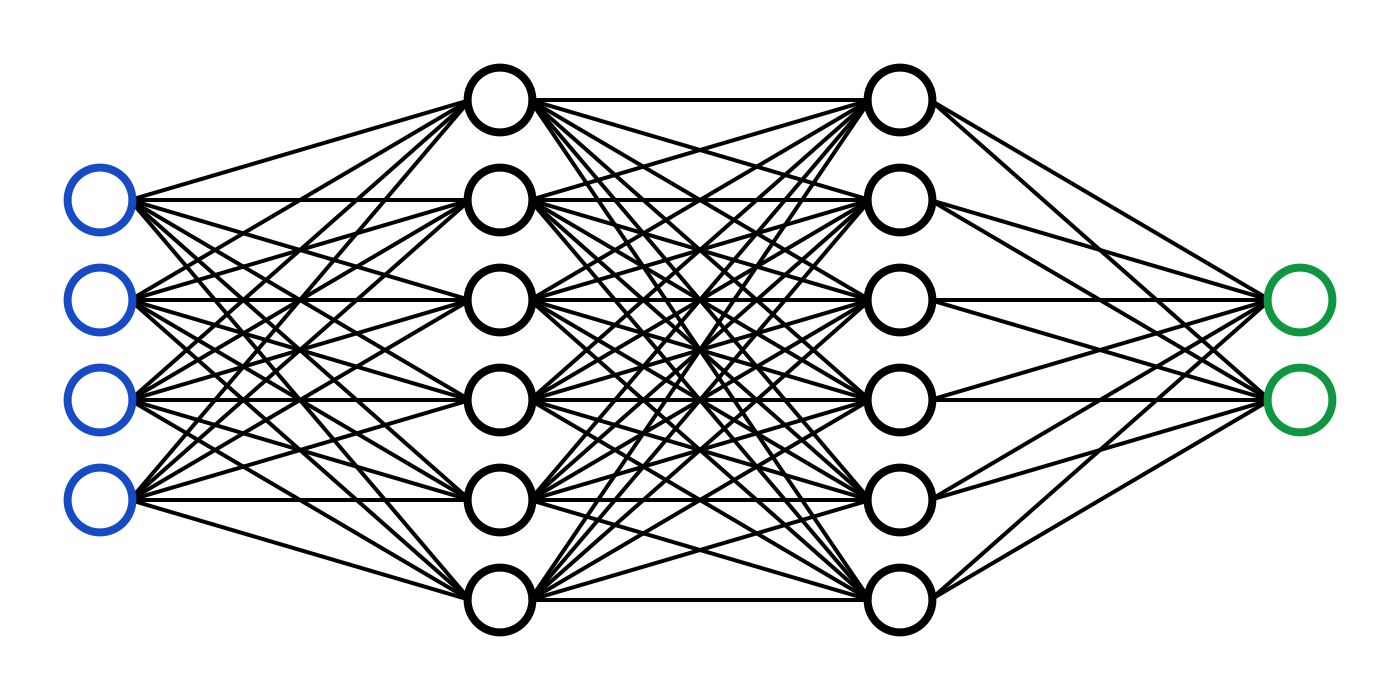

In [57]:
import torch
import torch.nn.functional as F
#define the neuron 
class NeuralNetwork():
    def __init(self):
        pass

    def neural_layer(self, input_vector : torch.tensor, hidden_neurons : int, n_epochs : int, learning_rate : float, bias : bool = False) -> torch.Tensor:
        """Works as neuron of the neural network layer
        each input for this case is of the shape [228146, 27], where 228146 is the number of examples to train on
        and 27 is the num of classes. The former could be of any length, could 
        be a feature vector of length 512 or simply a single number 
        representing the integer id of the character 
         
        Args
            input_features: the length of the feature vector described above
            hidden_neurons: the number of hidden neurons in the neural layer
            bias: if a bias term should be added the operations 
        """

        input_features = input_vector.shape[1]
        num_examples = input_vector.shape[0]
        W = torch.randn(size = (input_features, hidden_neurons), requires_grad=True) #in tbe size parameter, first dimension
                                                            #represents the input size, second dimension
                                                            #represents the number of neuron 
        if bias:
            b = torch.randn(size = (num_examples, hidden_neurons), requires_grad= True)
        else:
            b = torch.zeros(size = (num_examples, hidden_neurons), requires_grad=True)

        probs = self.optimization_loop(W, input_vector, b, n_epochs, learning_rate)
        return probs

    def optimization_loop(self, W : torch.Tensor, input_vector : torch.Tensor, b : torch.Tensor, n_epochs : int, learning_rate : float) -> torch.Tensor:
        """
        the forward method of the neural layer representing the operation being
        performered in each of the hidden units. First the features get multiplied by
        a weight matrix and a bias is added. then a softmax(usually) is applied to output probabilities.
        """
        for epoch in range(n_epochs):

            #forward pass
            logits = torch.matmul(input_vector, W) + b #logits = log-counts
            #now we applt the softmax
            counts = logits.exp()
            probs = counts/counts.sum(1, keepdim=True)
            loss = -probs[torch.arange(num), ys].log().mean()
            print("Loss: ", loss.item())

            #backward pass
            #initialize the gradient with None, for efficiency
            W.grad = None
            loss.backward()
            W.data += -learning_rate*W.grad


        return probs 
    

probs = NeuralNetwork().neural_layer(input_vector = xenc,
                                     hidden_neurons = 27,
                                     n_epochs=100,
                                     learning_rate=50,
                                     bias = False)

Loss:  3.6854422092437744
Loss:  3.325977325439453
Loss:  3.132646083831787
Loss:  3.003814458847046
Loss:  2.9082930088043213
Loss:  2.8366804122924805
Loss:  2.7825372219085693
Loss:  2.7409701347351074
Loss:  2.7084107398986816
Loss:  2.6824495792388916
Loss:  2.661489248275757
Loss:  2.6443774700164795
Loss:  2.6301987171173096
Loss:  2.6182267665863037
Loss:  2.6079225540161133
Loss:  2.5989058017730713
Loss:  2.590911388397217
Loss:  2.583750009536743
Loss:  2.5772829055786133
Loss:  2.5714056491851807
Loss:  2.5660347938537598
Loss:  2.5611045360565186
Loss:  2.5565614700317383
Loss:  2.5523598194122314
Loss:  2.5484619140625
Loss:  2.5448355674743652
Loss:  2.541452646255493
Loss:  2.5382888317108154
Loss:  2.53532338142395
Loss:  2.5325369834899902
Loss:  2.529914140701294
Loss:  2.5274407863616943
Loss:  2.5251033306121826
Loss:  2.522891044616699
Loss:  2.520794153213501
Loss:  2.518803358078003
Loss:  2.5169107913970947
Loss:  2.515108823776245
Loss:  2.5133910179138184
Los

In [44]:
probs.shape

torch.Size([228146, 27])

In [47]:
#writing a summary 
nlls = torch.zeros(5)

for i in range(5):
    #i-th bigram
    x = xs[i].item() #input character index
    y = ys[i].item() #label character index
    print("=========")
    print(f"bigram example {i+1}: {char_map[x]}{char_map[y]} (indexes {x},{y}")
    print("input to the neural nets:", x)
    print("output probabilities of the neural net:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the net to the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("-%-%-%-%-%-%-%-%-%-%-%-%-%-%-%-%-")
print('average negative log likelihood for 5 examples i.e. loss=', nlls.mean().item())


bigram example 1: .e (indexes 26,4
input to the neural nets: 26
output probabilities of the neural net: tensor([0.0559, 0.0724, 0.0805, 0.0105, 0.0241, 0.0795, 0.0128, 0.0377, 0.0418,
        0.0912, 0.0234, 0.0099, 0.0068, 0.0343, 0.0053, 0.0248, 0.0113, 0.0400,
        0.0210, 0.0406, 0.0236, 0.0090, 0.0935, 0.0518, 0.0485, 0.0376, 0.0120])
label (actual next character): 4
probability assigned by the net to the correct character: 0.02414710633456707
log likelihood: -3.723590850830078
negative log likelihood: 3.723590850830078
bigram example 2: em (indexes 4,12
input to the neural nets: 4
output probabilities of the neural net: tensor([0.0328, 0.0621, 0.0215, 0.0456, 0.0045, 0.0263, 0.0363, 0.0273, 0.0370,
        0.0299, 0.0429, 0.0371, 0.0563, 0.0999, 0.0706, 0.0209, 0.0181, 0.0250,
        0.0792, 0.0090, 0.0321, 0.0082, 0.0149, 0.0090, 0.0341, 0.0691, 0.0500])
label (actual next character): 12
probability assigned by the net to the correct character: 0.05634860321879387
log likeli

### ======= !!! OPTIMIZATION !!! ========
This loop is added in te neural network already, but for an intensive explanation this cell can be used


In [60]:
def optimization_loop(self, W : torch.Tensor, input_vector : torch.Tensor, b : torch.Tensor, n_epochs : int, learning_rate : float) -> torch.Tensor:
        """
        the forward method of the neural layer representing the operation being
        performered in each of the hidden units. First the features get multiplied by
        a weight matrix and a bias is added. then a softmax(usually) is applied to output probabilities.
        
        Args: 
            W: weight matrix,
            input_vector: input data coming into the network,
            b: bias vector
            n_epochs: the number of training loops,
            learning_rate: learning rate for the loss fucntionn
        
        """
        for epoch in range(n_epochs):

            #forward pass
            logits = torch.matmul(input_vector, W) + b #logits = log-counts
            #now we applt the softmax
            counts = logits.exp()
            probs = counts/counts.sum(1, keepdim=True)
            num = input_vector.nelement()

            #the loss could be a simple log likelihood loss like the follwing
            loss = probs[torch.arange(num), ys].log().mean()

            #or it could be a log likelihood along with a regularization term
            #loss = probs[torch.arange(num), ys].log().mean() + regularization_rate*(W**2).mean()
            
            print("Loss: ", loss)

            #backward pass
            #initialize the gradient with None, for efficiency
            W.grad = None
            loss.backward()
            W.data += -learning_rate*W.grad


        return probs 
 


### Sampling from the neural net

In [65]:
#create a generator object
g = torch.Generator().manual_seed(2123456)

for i in range(5):
    out = []
    id = 0
    while True:
        id = torch.multinomial(probs[1], num_samples=1, replacement=True, generator=g).item()
        out.append(char_map[id])
        if id == 0:
            break
    print(''.join(out))


n.a
ssnrdloa
yplinl.sy.dt.yvl.yllra
nonllra
smxr.ena
